In [1]:
import os
import imageio
import numpy as np
import keras
import pandas as pd
from sklearn.model_selection import  train_test_split
from skimage.feature import hog
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D


In [2]:
data = []
labels = []

num_classes = 43

for i in range(num_classes):
    training_directory = './MyData/' + str(i) + '/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.png')):
            image = imageio.imread(training_directory + filename)

            #Populating arrays
            data.append(np.array(image))
            labels.append(i)
    print(str(i), end=' ')

## Force it to be np.array
data = np.array(data)
labels = np.array(labels)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [3]:
print(data[0].__class__)
print(data[0].shape)
print(data.__class__)
print(data.shape)

<class 'numpy.ndarray'>
(32, 32, 3)
<class 'numpy.ndarray'>
(34799, 32, 32, 3)


In [4]:
print(labels[0].__class__)
print(labels[0].shape)
print(labels.__class__)
print(labels.shape)

<class 'numpy.int32'>
()
<class 'numpy.ndarray'>
(34799,)


In [5]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
def one_hot_to_label(one_hot):
     return np.argmax(one_hot)

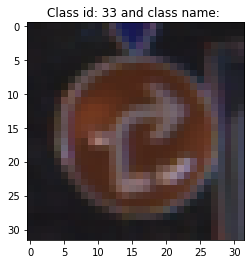

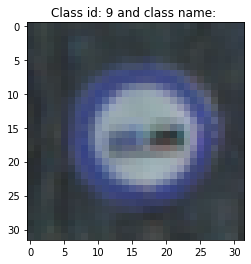

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(2):
    label = one_hot_to_label(y_train[i])
    plt.figure()
    plt.title("Class id: "+ str(label)+ " and class name: ")
    plt.imshow(x_train[i])

In [11]:
#Model 1

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

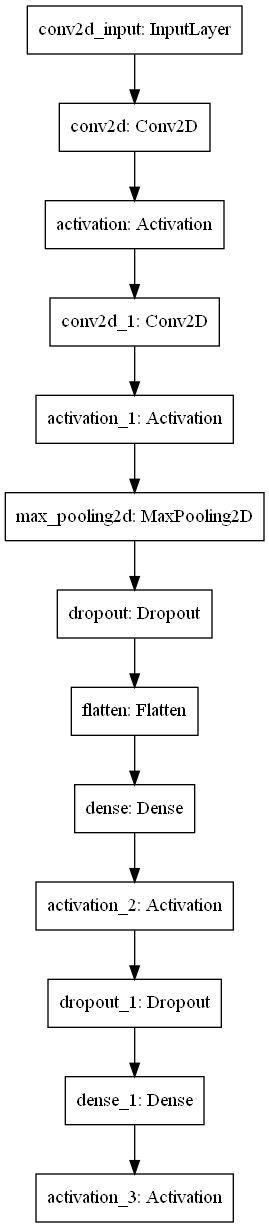

In [13]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model).create(prog='dot', format='png'))

In [14]:
batch_size = 128
epochs = 30

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
191/191 [==============================] - 29s 153ms/step - loss: 1.4326 - accuracy: 0.6190 - val_loss: 0.2822 - val_accuracy: 0.9407
Epoch 2/30
191/191 [==============================] - 31s 161ms/step - loss: 0.3090 - accuracy: 0.9143 - val_loss: 0.1180 - val_accuracy: 0.9733
Epoch 3/30
191/191 [==============================] - 31s 161ms/step - loss: 0.1699 - accuracy: 0.9528 - val_loss: 0.0783 - val_accuracy: 0.9823
Epoch 4/30
191/191 [==============================] - 30s 159ms/step - loss: 0.1100 - accuracy: 0.9692 - val_loss: 0.0521 - val_accuracy: 0.9876
Epoch 5/30
191/191 [==============================] - 30s 159ms/step - loss: 0.0795 - accuracy: 0.9783 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 6/30
191/191 [==============================] - 30s 156ms/step - loss: 0.0627 - accuracy: 0.9818 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 7/30
191/191 [==============================] - 30s 157ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0306 - val_ac

In [15]:
model.save('k_model.h5')

In [27]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding='valid', input_shape=x_train.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [29]:
batch_size = 128
epochs = 20

history2 = model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
191/191 [==============================] - 13s 69ms/step - loss: 2.6025 - accuracy: 0.3001 - val_loss: 1.3237 - val_accuracy: 0.6405
Epoch 2/20
191/191 [==============================] - 14s 71ms/step - loss: 1.1975 - accuracy: 0.6324 - val_loss: 0.5648 - val_accuracy: 0.8481
Epoch 3/20
191/191 [==============================] - 14s 73ms/step - loss: 0.7070 - accuracy: 0.7781 - val_loss: 0.3126 - val_accuracy: 0.9223
Epoch 4/20
191/191 [==============================] - 13s 68ms/step - loss: 0.4877 - accuracy: 0.8466 - val_loss: 0.2030 - val_accuracy: 0.9522
Epoch 5/20
191/191 [==============================] - 14s 71ms/step - loss: 0.3693 - accuracy: 0.8858 - val_loss: 0.1487 - val_accuracy: 0.9653
Epoch 6/20
191/191 [==============================] - 15s 80ms/step - loss: 0.3031 - accuracy: 0.9053 - val_loss: 0.1119 - val_accuracy: 0.9740
Epoch 7/20
191/191 [==============================] - 14s 75ms/step - loss: 0.2562 - accuracy: 0.9213 - val_loss: 0.1107 - val_accuracy:

In [16]:
import numpy as np
from numpy import argmax

y_pred = model.predict(x_test)
test = y_pred.round()

results = []

for x in range(len(test)):
  results.append([np.argmax(test[x])])

In [17]:
classes = pd.read_csv('./labels.csv')
classes = np.array(classes)
classes.shape

(43, 2)

In [ ]:
classes[0][1]

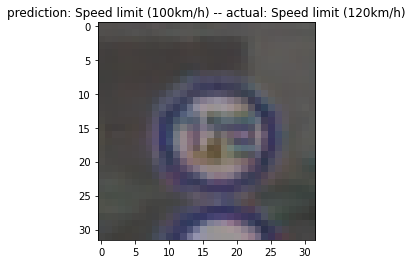

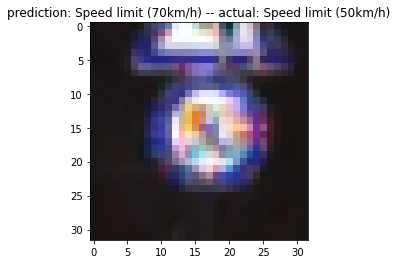

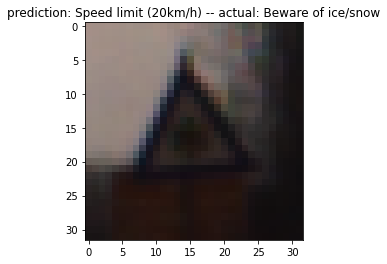

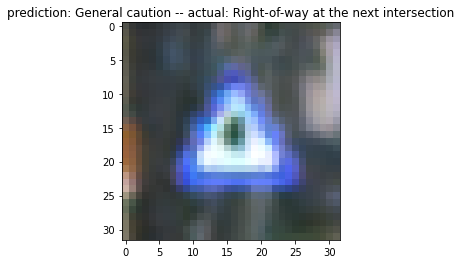

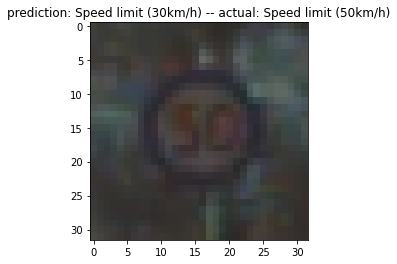

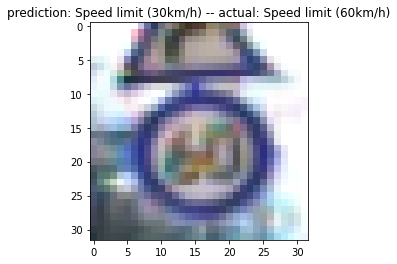

In [18]:
for i in range(1000):
    pred = np.argmax(test[i])
    ans = np.argmax(y_test[i])
    
    if (pred != ans):
        plt.figure()
        plt.title("prediction: " + classes[pred][1] + " -- actual: " + classes[ans][1])
        plt.imshow(x_test[i])


# y_test[i].__class__


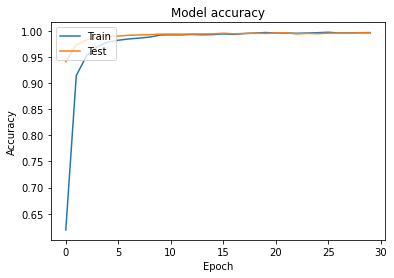

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

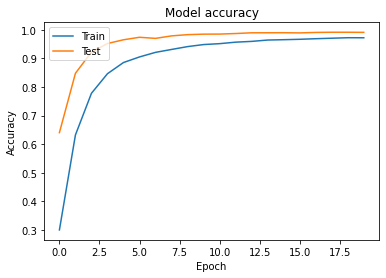

In [31]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
for i in range(20):
    print(str(i) + ": " + str(history2.history['accuracy'][i]))

0: 0.30013546347618103
1: 0.6323740482330322
2: 0.7781107425689697
3: 0.8466275334358215
4: 0.8857506513595581
5: 0.9052916765213013
6: 0.9213021993637085
7: 0.9314422011375427
8: 0.941417932510376
9: 0.9485611319541931
10: 0.9517221450805664
11: 0.9569358229637146
12: 0.9596863389015198
13: 0.9643663763999939
14: 0.965597927570343
15: 0.9669936895370483
16: 0.9690463542938232
17: 0.9707295298576355
18: 0.9724947810173035
19: 0.9723305702209473
